In [1]:
# import base python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# import ml framework libraries
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [3]:
def processData():
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    
    # printing first 10 images
    for i in range(10):
        
        plt.subplot(3,4,i+1)
        plt.tight_layout()
        plt.imshow(x_train[i], cmap ='gray', interpolation='none')
        plt.title("Label: {}".format(y_train[i]))
        plt.xticks([])
        plt.yticks([])
        
        
    # define the train data as float 32
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    
    # normalize here
    x_train /= 255
    x_test /= 255
    
    # do one-hot encoding here using npy
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)

    # step to do before padding
    x_train = x_train.reshape(x_train.shape[0], 28,28,1)
    x_test = x_test.reshape(x_test.shape[0], 28,28,1)
    
    # pad the xtrain and xtest with 2 on both sides (28 + 2 + 2 = 32)
    x_train = np.pad(x_train, [[0, 0], [2, 2], [2, 2], [0, 0]], mode = 'constant')
    x_test= np.pad(x_test, [[0, 0], [2, 2], [2, 2], [0, 0]],mode = 'constant')
     
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    
    return [x_train, x_test, y_train, y_test]

In [4]:
# Let's define our network architecure here
def LeNet(filter_size, max_pooling_size, dropout,activation_func, num_classes, optimizer, lr, decay_val):
    
    num_filters_fcl_1 = 120
    num_filters_fcl_2 = 84

    model = Sequential()
    
    # First layer with kernel size as the filter size
    model.add(Conv2D(16, (filter_size, filter_size), activation = activation_func ,padding='same', input_shape=(32, 32,1)))
    model.add(MaxPooling2D((max_pooling_size, max_pooling_size))) # Max pooling of size 2
    model.add(Dropout(dropout)) # Define the dropout of first layer

    # Second Layer with kernel size as the filter size
    model.add(Conv2D(6, (filter_size, filter_size), activation = activation_func, padding='same',input_shape=(14, 14,1)))
    model.add(MaxPooling2D((max_pooling_size, max_pooling_size))) # Max pooling
    model.add(Dropout(dropout))  # Define Dropout of second layer

    # Flatten the CNN output
    model.add(Flatten())
    
    # Then add 3 dense Layers and their activation funtion for the fully connected network
    model.add(Dense(num_filters_fcl_1)) # fileter size of 120
    model.add(Dense(num_filters_fcl_2, activation = activation_func,))

    model.add(Dense(num_filters_fcl_2)) # filter size of 84
    model.add(Dense(num_filters_fcl_2, activation = activation_func,)) 
 
    # For classification, the activation is softmax
    model.add(Dense(num_classes)) # size = 10
    model.add(Dense(num_classes, activation = 'softmax',))

    # I will be trying different optimizers here
    # Different Optimizers parameters are: Adadelta, SGD, RMSprop, Adagrad and Adam
   
    
    if optimizer == 'SGD':
        print(optimizer)
        model.compile(loss ='categorical_crossentropy', 
                       optimizer = keras.optimizers.SGD(learning_rate = lr, momentum = 0.9, decay = decay_val),
                       metrics=['accuracy'])
            
    elif optimizer == 'RMSprop':
        print(optimizer)
        model.compile(loss = 'categorical_crossentropy', 
                       optimizer = keras.optimizers.RMSprop(learning_rate = lr,rho=0.9, momentum=0.0, epsilon=1e-07,  decay = decay_val),
                       metrics=['accuracy'])

    elif optimizer == 'Adagrad':
        print(optimizer)
        model.compile(loss = 'categorical_crossentropy', 
                       optimizer=keras.optimizers.Adagrad(learning_rate = lr, initial_accumulator_value=0.1, epsilon=1e-07, decay = decay_val),
                       metrics = ['accuracy'])

    elif optimizer == 'Adadelta':
        
        model.compile(loss = 'categorical_crossentropy', 
                       optimizer = keras.optimizers.Adadelta(learning_rate = lr, rho = 0.95, epsilon = 1e-07, decay = decay_val),
                       metrics=['accuracy'])

    elif optimizer == 'Adam':
        model.compile(loss = 'categorical_crossentropy', 
                       optimizer = keras.optimizers.Adam(learning_rate = lr, beta_1=0.9, beta_2 = 0.999, epsilon=1e-07, decay = decay_val),
                       metrics=['accuracy'])
    print(model.summary)
    return model  
    

In [5]:
# Plot the accuracy curve
def plot(train_value, test_value, acc_val):
    f, ax = plt.subplots()
    plt.plot([None] + train_value, 'o-')
    plt.plot([None] + test_value, 'x-')
    plt.legend(['Train ' + acc_val, 'Test ' + acc_val], loc=0)
    plt.title('Training and Test ' + acc_val + ' per epoch')
    plt.xlabel('Epoch')
    plt.ylabel(acc_val)
    plt.show()

In [32]:
## Program Run starts here


# define the hyperparameters to use
filter_size = 5
max_pooling_size = 2
epochs = 30
batch = 128
num_classes = 10

In [33]:
# define parameters
activation = 'relu'      #['linear', 'selu', 'relu', 'tanh', 'sigmoid']
dropout = 0.25           
optmizer = 'Adadelta'        #['SGD', 'Adadelta', 'Adam', 'Adagrad', 'RMSprop']
learningRate = 0.001     #[0.01, 0.1, 0.5]
decayVal = learningRate / epochs

x_train shape: (60000, 32, 32, 1)
60000 train samples
10000 test samples


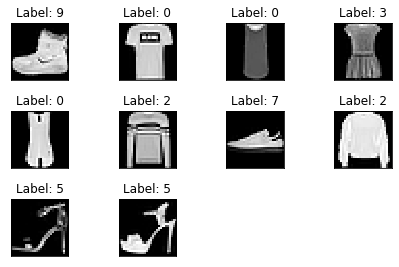

In [30]:
# load the pre-processed data
x_train, x_test, y_train, y_test = processData()

In [31]:
# train the normal image MNIST here
start_time = time.time()
    
lenetModel = LeNet(  filter_size,
                     max_pooling_size,
                     dropout,
                     activation, 
                     num_classes,
                     optmizer,
                     learningRate,
                     decayVal)

print('Start training.')

hist = lenetModel.fit(x_train, y_train, epochs = epochs, batch_size = batch,
                    validation_data = (x_test, y_test), verbose=1)
print("Training took {0} seconds.".format(time.time() - start_time))

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fab13a95ed0>>
Start training.
Epoch 1/30
469/469 [==============================] - 78s 165ms/step - loss: 0.9998 - accuracy: 0.6194 - val_loss: 0.4846 - val_accuracy: 0.8235
Epoch 2/30
469/469 [==============================] - 77s 164ms/step - loss: 0.4962 - accuracy: 0.8171 - val_loss: 0.4078 - val_accuracy: 0.8483
Epoch 3/30
469/469 [==============================] - 77s 164ms/step - loss: 0.4208 - accuracy: 0.8447 - val_loss: 0.3708 - val_accuracy: 0.8652
Epoch 4/30
469/469 [==============================] - 76s 163ms/step - loss: 0.3864 - accuracy: 0.8563 - val_loss: 0.3447 - val_accuracy: 0.8728
Epoch 5/30
469/469 [==============================] - 77s 164ms/step - loss: 0.3548 - accuracy: 0.8697 - val_loss: 0.3322 - val_accuracy: 0.8778
Epoch 6/30
469/469 [==============================] - 77s 164ms/step - loss: 0.3382 - accuracy: 0.8741 - val_loss: 0.3114 - val_accuracy: 0.8839
Ep

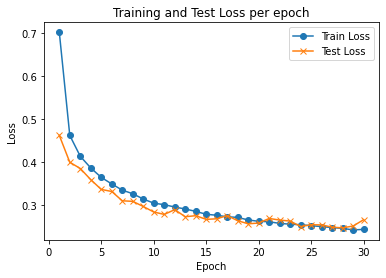

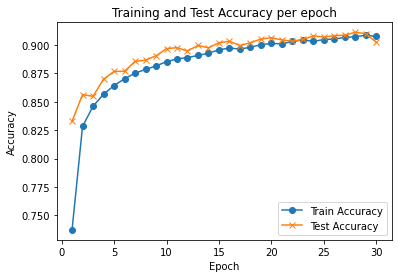

In [26]:
# plot the accuracy vs loss of the trainning images
plot(hist.history['loss'], hist.history['val_loss'], 'Loss')
plot(hist.history['accuracy'], hist.history['val_accuracy'], 'Accuracy')

In [27]:
## test on the model on the normal image and the negative images
testRes = lenetModel.evaluate(x_test, y_test, verbose = 1)
print("Test loss {:.4f}, accuracy for normal images {:.2f}%".format(testRes[0], testRes[1] * 100))

313/313 [==============================] - 3s 11ms/step - loss: 0.2664 - accuracy: 0.9023
Test loss 0.2664, accuracy for normal images 90.23%
